# Data Exploration, Data Cleaning, and Basic Data Visualization

In the best of circumstances (e.g., when you're using sample datasets in school), your data will be clearly defined, devoid of missing values or type errors, and otherwise perfectly curated for you to import and begin working with. 

*In practice, this is almost never the case.* 

As a data scientist within a consulting team, you'll be expected to explore, deeply understand, and clean data before you conduct any analysis on it. According to Anaconda's 2021 State of Data Science survey, survey respondents said they spend “39% of their time on data prep and data cleansing, which is more than the time spent on model training, model selection, and deploying models combined.”

In a data science-oriented engagement, you will often spend weeks collecting, analyzing, and curating data, then present a profile of that data to your client to ensure that the steps you've taken are acceptable before you even begin model development. 

This notebook contains code snippets for typical steps you might take to begin exploring a dataset and, once you understanding, cleaning it. In practice, though, data cleaning and exploration is among the best opportunities to improvise and apply your ingenuity and knowledge as a data scientist, so there's no set approach. It's also typically a time in your project when you would rely heavily of subject-matter experts (e.g., if you work with the FDA account, doctors or epidemiologists) to help intepret the data. 

##### Pandas, Numpy, and MatPlotlib

We'll be using Pandas and Numpy to clean and explore this data, and for most of the other notebooks, and we'll be using Matplot lib to visualize it. The basic unit of Pandas is the "dataframe", an object of stores data sets from files (e.g., .csv files) into two-dimensional, tabular matrices. Pandas is the main library that data scientists use to manipulate data, and Numpy is a library with which Pandas is often paired for deeper scientific and mathetmical analyses. Matplotlib is used for visualization, and together, the libraries can accomplish the vast majority of data exploration, cleaning, and visualization tasks.

Like elsewhere in this course, the key for using Pandas, Numpy, and Matplot correctly is *flexibility*. Try lots of things, see what works and what doesn't, and don't get fixed into a particular mindset or habit. Also, when you're beginning to optimized for performance down the road, note that Pandas dataframes require a relatively large amount of memory. It's often better to replace data transformations with SQL queries down the road after having conducted initial exploration in Pandas. 

Also note that data exploration, cleaning, and visualization is an ongoing process. In the notebooks for classification, regression, etc., you'll see lots of additional visualizations and explorations of features that are particularly releveant for that analysis. That's typical, becuase in practice, visualization and exploration of the data changes and adapts as the analytical needs of the project changes. 

### Create a Numpy Array and show basic information

The following script creates an array and dataframe from scratch and shows code for printing basic information to the console: 

In [1]:
# Importing the numpy package
import numpy as np

# Create the array from a list
data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
grades = np.array(data) 

# Finding the type of the array
print(type(grades))

<class 'numpy.ndarray'>


In [2]:
# Finding the dimension of the array
print(grades.shape)

(22,)


In [3]:
# Finding the first entry of the array
print(grades[0])

50


In [4]:
# Finding the mean of the array
print(grades.mean())

49.18181818181818


The following script combines two arrays into a multi-dimensional arrays and prints basic information to the console:m 

In [5]:
# Adding a second list to the array to create a two dimensional array
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]
student_data = np.array([study_hours, grades])

# Finding the dimensions of the array - as always, the results should be intepreted "rows, colums"
print(student_data.shape)



(2, 22)


In [6]:
#Storying the mean for each row in the array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

# Printing the results above to the console with formatting
print('Average study hours: {:.2f}\nAverage grade: {:.2f}'.format(avg_study, avg_grade))

Average study hours: 10.52
Average grade: 49.18


For more information as to the types of analyses you can conduct on numpy arrays, see this Numpy documentation [here](https://numpy.org/doc/). We'll be coming back to Numpy frequently. 

### Create a DataFrame and filter using .loc, .iloc, query, and others

The following code creates a dataframe and applies basic filters and queries to it. 

*Note: The difference between .loc and .iloc is that, counter-intuitively, .loc filters rows based on their index and .iloc filters rows based on their ordinal location within the dataframe. In general, it is more flexible and better practice to filter based on .loc* 

In [7]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'StudyHours':student_data[0],
                            'Grade':student_data[1]})

df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [8]:
# Finding the row at index location 5
df_students.loc[5]

Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object

In [9]:
# Subsetting to index rows 0 through 4
df_students.loc[0:4]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [10]:
# Showing the Grade for index 0
df_students.loc[0,'Grade']

50.0

In [11]:
# Showing the rows where Name is Aisha
df_students.loc[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


In [12]:
# Subsetting to the first through fifth rows (remember, counting in Pandas starts at 0)
df_students.iloc[0:4]

,Name,StudyHours,Grade
0,Dan,10.0,50.0
1,Joann,11.5,50.0
2,Pedro,9.0,47.0
3,Rosie,16.0,97.0


In [13]:
# Subsetting to the first row and 2nd and 3rd columnss
df_students.iloc[0,[1,2]]

StudyHours    10.0
Grade         50.0
Name: 0, dtype: object

There are often multiple ways to do the same thing in Pandas. For example, the following three statements all filter rows based on the Name column equal to 'Aisha': 

In [14]:
df_students.query('Name=="Aisha"')
df_students[df_students.Name == 'Aisha']
df_students[df_students['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


### Loading a Pandas Dataframe and Dealing with Missing Values

The following code loads Pandas from a local .csv file. The !wget command runs the bash command wget to pull data from a raw Github data source. You can use it during the exercise to pull data directly from Github, as long as the url points to a similar data source. 

In [15]:
# Importing the data to local directory
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
# Reading the data into a Pandas dataframe
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

--2022-07-03 11:12:29--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: 'grades.csv.4'

grades.csv.4        100%[===================>]     322  --.-KB/s    in 0s      

2022-07-03 11:12:29 (25.6 MB/s) - 'grades.csv.4' saved [322/322]



In [16]:
# Show whether there are null values in the data, as a Boolean
df_students.isnull().head()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [17]:
# Finding null values by column
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [18]:
# Showing rows with null values
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [19]:
# Filling null values with the mean of that column
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students.Grade = df_students.Grade.fillna(df_students.Grade.mean())

In [20]:
# Aftering having filling null values with those means, showing null values again by column: 
df_students.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

### Creating a New Feature

Even at this early stage, it might be helpful to create a new feature, to better understand patterns in your data. Feature engineering is the art/science of creating new features in datasets based on what will be helpful in analyses. There are entire books written on feature engineering, and it's possibly the most important part of being a data scientist, and the part in which domain-area expertise is most important. 

For now, I'll just show the basic syntax for creating a new column (i.e., a new feature) in a Pandas dataframe based on existing data. In this case, we'll create a new column that shows whether or not students passed, based on their grades: 

In [21]:
# Creating the Pass column based on whether the student's grade was greater than 60
df_students["Pass"] = df_students['Grade']>=60

#Taking a peak to make sure the variable did what we wanted it to
df_students.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


### Grouping and sorting data

The following code shows how you might group and sort data based on various criteria. This can be helpful to detect patterns early on. In this case, we'll group and sort to examine the relationship between grades, study hours, and whether or not the students passed (our new features): 

In [22]:
# Grouping students by whether or not they passed
df_students.groupby(df_students.Pass).Name.count()

Pass
False    17
True      7
Name: Name, dtype: int64

In [23]:
# Grouping students by whether or not they passed and showing their mean grades and Study Hours
df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean()

/var/folders/x3/d55ycfh10xl3qzrrp818k8xw0000gn/T/ipykernel_50329/4153175998.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean()


,StudyHours,Grade
Pass,,
False,8.83312,39.315508
True,14.25000,73.142857


In [24]:
# Sorting students by grade
df_students.sort_values('Grade', ascending=False)

,Name,StudyHours,Grade,Pass
3,Rosie,16.000000,97.000000,True
10,Francesca,15.500000,82.000000,True
9,Giovanni,14.500000,74.000000,True
14,Jenny,15.500000,70.000000,True
21,Aisha,12.000000,64.000000,True
20,Daniel,12.500000,63.000000,True
11,Rajab,13.750000,62.000000,True
6,Frederic,11.500000,53.000000,False
19,Skye,12.000000,52.000000,False
0,Dan,10.000000,50.000000,False


Clearly, there's some sort of relationship between hours studied, grades, and whether a student passed! Who knew. 

# Visualize Data with Matplotlib

All right, let's get visualizing! Visualizations are critical for data scientists to understand data and detect patterns, and they are even more important for clients, who may or may not have the technical backgrounds or the time to understand strictly-numerical analyses. 

In Matplot, the basic object is the "pyplot", which, once created, can be added to and tweaked in various ways for the best possible visualization. Multiple plots can also be rendered in "figures", to show them together in neat, organized ways. 



The following code creates a simple plot using the students data we've been manipulating. 

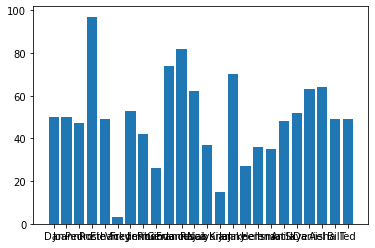

In [25]:
%matplotlib inline 
# importing matplot
from matplotlib import pyplot as plt
# Add a bar chart to the pyplot
plt.bar(x=df_students.Name, height = df_students.Grade)
# Showing the plot
plt.show()

As you can see, this plot is nowhere near client-ready. The following code shows several transformation to the pyplot object to make it more palatable: 

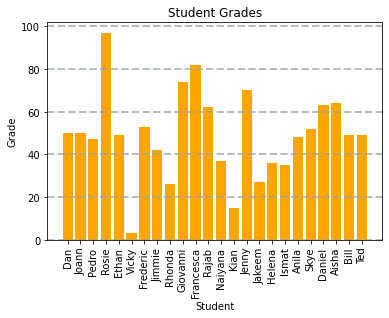

In [26]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Adding a title
plt.title('Student Grades')
# Adding a x-axis label
plt.xlabel('Student')
# Adding a y-axis label
plt.ylabel('Grade')
# Adding a grid
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
# Rotating the x-labels 90 degrees so they don't overlap
plt.xticks(rotation=90)

# Display the plot
plt.show()

#### Using a figure to render multiple pyplots

The following code uses a figure to render multiple pyplots together: 

/var/folders/x3/d55ycfh10xl3qzrrp818k8xw0000gn/T/ipykernel_50329/471921506.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
/var/folders/x3/d55ycfh10xl3qzrrp818k8xw0000gn/T/ipykernel_50329/471921506.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


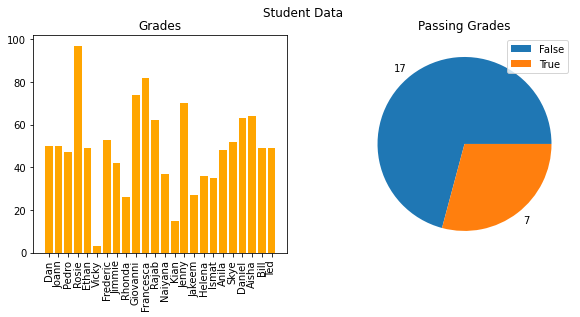

In [27]:
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
# Settling title for the bar plot
ax[0].set_title('Grades')
# Rotating the x-labels of the bar plot
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pass counts variable
pass_counts = df_students['Pass'].value_counts()
# Add a pie chart of pass counts to the second axis
ax[1].pie(pass_counts, labels=pass_counts)
# Setting the title for the pie chart
ax[1].set_title('Passing Grades')
# Creating a legend fo the pie chart
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

### Applying Description Statistics to Pyplots

It can also be helpful to show basic descriptive statistics on pyplots. For example, consider the following histogram of the "Grade" variable: 

/var/folders/x3/d55ycfh10xl3qzrrp818k8xw0000gn/T/ipykernel_50329/3926818928.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


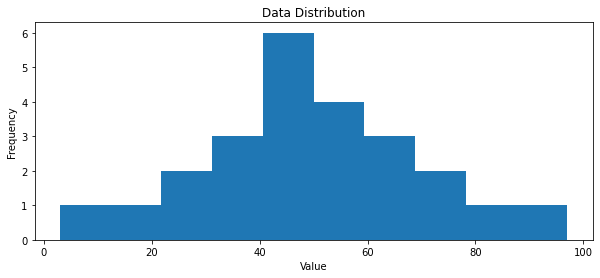

In [28]:
# Creating an just for Grade data
var_data = df_students['Grade']
# Creating a figure with wide dimensions
fig = plt.figure(figsize=(10,4))
# Adding a histogram to the plot
plt.hist(var_data)
# Setting the plot title
plt.title('Data Distribution')
# Seeing the x-label
plt.xlabel('Value')
# Setting the y-label
plt.ylabel('Frequency')
# Showing the plot
fig.show()

Using matplot, we can add lines that show critical descriptive statistics, such as mean and median to the histogram: 

/var/folders/x3/d55ycfh10xl3qzrrp818k8xw0000gn/T/ipykernel_50329/2349089198.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


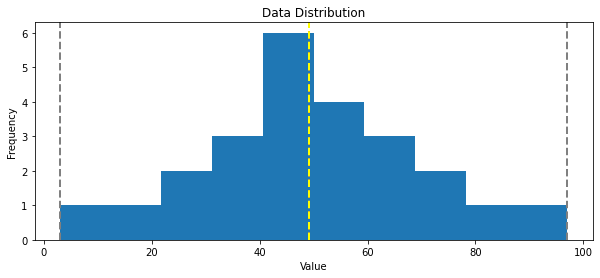

In [29]:
# Creating the Grade variable
var = df_students['Grade']

# Get variables for each statistic: min, max, mean, median, and mode
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

#Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add the lines for each of the statistics above
plt.axvline(x=min_val, color = 'gray', linestyle = 'dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()


# Exercise

Suppose that your client wants you to explore a dataset and give a presentation on it to them, where you describe the contents of the data set, the possible complications with regards to data hygiene, and your proposed steps for preparing the data for analysis. Choose one of the following datasets and put together that presentation: [Github Dataset Collection](https://gist.github.com/rnirmal/e01acfdaf54a6f9b24e91ba4cae63518)

#### Sources 

This notebook draws partially from examples in Azure's Data Science certification track. For more information, see this [link](https://docs.microsoft.com/en-us/learn/certifications/azure-data-scientist/). 